# KWAKU APPIAH-ADU - F020738
# 20COP506 COURSE WORK
## Table of Contents
* Title & Abstract
* Objectives of this Tutorial
* Similar Tutorials Online (References)

# Title & Abstract
## Multiple Linear Regression and Exploratory Data Analysis With Scikit-learn & Matplotlib
In this tutorial I will briefly implement Multiple Linear Regression in Python 3 using at least three functions from Scikit-learn and Matplotlib.
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. Multiple linear regression involves more than two variables 𝑓(𝑥,𝑦,𝑧)=𝑤1𝑥+𝑤2𝑦+𝑤3𝑧 where 𝑤 represents the weights our model will try to learn and 𝑥,𝑦,𝑧 represent the attributes about each observation. I'll use some packages in addition to better explain this tutorial.

_Reference: Source [1]_

# Objectives of this Tutorial
* Use Exploratory Data Anlysis to understand and gather insights from the dataset
* Understand how Multiple Linear Regression can be used to predict continuous values using Scikit-learn and Matplotlib.
* Evaluate performance of the algorithm (Multiple Linear Regression) on the dataset
* Predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing.

# Similar Tutorials
Inspriation for this tutorial taken was from [Stack Abuse - Linear Regression in Python with Scikit-Learn](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#:~:text=Linear%20Regression%20is%20a%20supervised,Simple%20regression), [What is Exploratory Data Analysis?](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15) and [Exploratory_Data_Analysis-Wine_Quality_Dataset / winequality_white.ipynb](https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb#Data-Insights). The main difference between the above mentioned tutorials and this coursework is that in this coursework I demostrate how Exploratary Data Analysis (EDA) and Multiple Linear Regression can be used hand in hand and how results from EDA help improve our model accuracy. 
## References
* [1. ML Glossary - Linear Regression](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#:~:text=Linear%20Regression%20is%20a%20supervised,Simple%20regression)
* [2. Stack Abuse - Linear Regression in Python with Scikit-Learn](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/)
* [3. Data to Fish - Example of Multiple Linear Regression in Python](https://datatofish.com/multiple-linear-regression-python/)
* [4. Towards Data Science - What is Exploratory Data Analysis?](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
* [5. Exploratory_Data_Analysis-Wine_Quality_Dataset / winequality_white.ipynb](https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb#Data-Insights)
* [6. Challenger USA Space Shuttle O-Ring Data Set](https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring)

# Exploratory Data Analysis With Matplotlib
First we begin with ** Exploratory Data Analysis ** of the dataset to understand and gather insights from the dataset.
* We will use the ** pyplot ** from ** matloplib ** along with other functions from seaborn to create a heatmap, correlation matrix, boxplot and distribution plot to visualise our dataset.

## Import Packages

In [262]:
# Import packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns

## Load The Dataset
This dataset was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring). The motivation for the collection of this data was the explosion of the USA Space Shuttle Challenger on 28 January, 1986. After investigation results showed that one of the three field joints on one of the two solid booster rockets had failed due to low launch temperature.
* The ".read_csv()" function of the pandas package imports the dataset.

_Reference: Source [6]_

In [263]:
# Import data with pandas
data = pd.read_csv('o-ring-erosion-only.csv')

In [264]:
# Print the imported data to see what data looks like
print(data)

    6  0  66   50   1
0   6  1  70   50   2
1   6  0  69   50   3
2   6  0  68   50   4
3   6  0  67   50   5
4   6  0  72   50   6
5   6  0  73  100   7
6   6  0  70  100   8
7   6  1  57  200   9
8   6  1  63  200  10
9   6  1  70  200  11
10  6  0  78  200  12
11  6  0  67  200  13
12  6  2  53  200  14
13  6  0  67  200  15
14  6  0  75  200  16
15  6  0  70  200  17
16  6  0  81  200  18
17  6  0  76  200  19
18  6  0  79  200  20
19  6  0  75  200  21
20  6  0  76  200  22
21  6  1  58  200  23


## Labeling of columns in Dataset
* The dataset does not include column names and so we add column names to the dataset with the ".columns()" function of the pandas package. 
* The ".head()" function of the pandas package returns the first five rows of the dataset.

In [265]:
# Label Dataset
data.columns = ['Number of O-rings at risk on a given flight', 'Number experiencing thermal distress', 'Launch temperature (degrees F)', 'Leak-check pressure (psi)', 'Temporal order of flight']
data.head()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [266]:
# View number of rows and columns in the dataset
data.shape

(22, 5)

## Summary of Statistical Details
* The ".describe()" function of pandas calculates the count, mean, standard deviation, minimum, maximum and the quartiles of the data set and returns them in a table format.
* Statistical data is important for gaining insights on properties of the dataset.

In [267]:
# Calculate Descriptive Statistics
data.describe()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
count,22.0,22.000000,22.000000,22.000000,22.000000
mean,6.0,0.318182,69.727273,156.818182,12.500000
std,0.0,0.567900,7.179215,66.000459,6.493587
min,6.0,0.000000,53.000000,50.000000,2.000000
25%,6.0,0.000000,67.000000,100.000000,7.250000
50%,6.0,0.000000,70.000000,200.000000,12.500000
75%,6.0,0.750000,75.000000,200.000000,17.750000
max,6.0,2.000000,81.000000,200.000000,23.000000


## Check Correlation
### Correlation Heatmap
Checking for correlated varaiables in the dataset is important for improving your linear regression model.
*  Here we use ".corr()" function from pandas to calculate the correlations and use the ".figure()" and ".heatmap()" functions from matplotlib and seaborn to visualise the correlation on a heatmap.

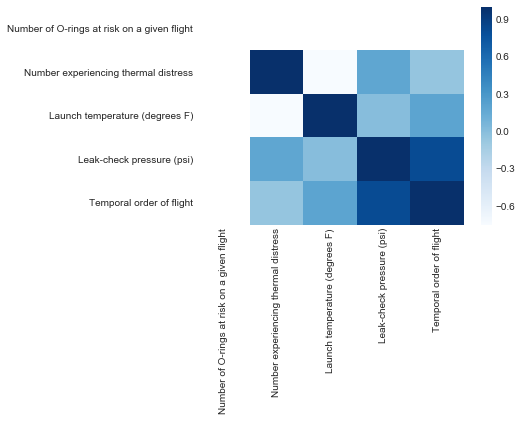

In [268]:
# Heatmap code as from source [5]

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='Blues',annot=False)

### end of source [5]
# source [5] https://nbviewer.jupyter.org/github/PBPatil/
# Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb#Data-Insights

### Observations from Correlation Heatmap
* Dark shades represent positive correlation while lighter shades represent negative correlation
* From the Heatmap we notice that launch temperature (independent variable) has a negative correlation with  number of O-rings experiencing thermal distress (dependent variable) which is what we are predicting.
* Thus this observation suggests that as the launch temperature increases the number of O-rings experiencing thermal distress decreases.
* The explosion of the USA Space Shuttle is dependent on the number of O-rings experiencing thermal distress.

_Reference: Source [4]_

### Correlation Matrix
* Here we use ".corr()" function from pandas to calculate the correlations and use the ".figure()" and ".heatmap()" functions from matplotlib and seaborn to visualise the correlation matrix on a heatmap. 
* Setting "annot=True" displays the correlation values on the heatmap.

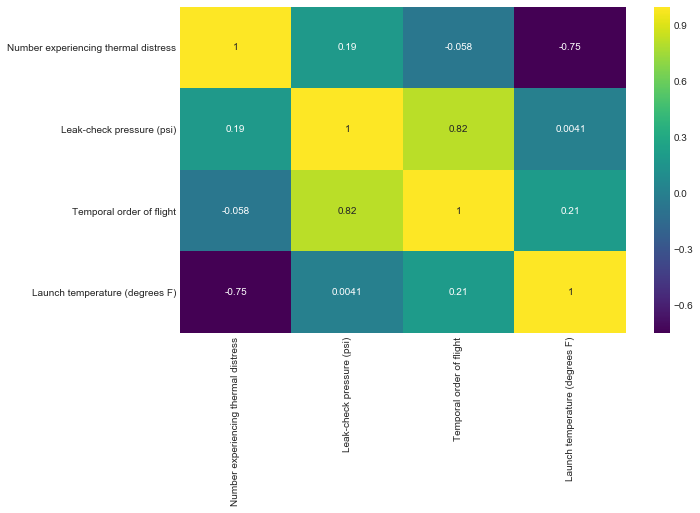

In [269]:
# Correlation matrix code as from source [5]

#correlation matrix
k = 5 #number of variables for heatmap
cols = data.corr().nlargest(k, 'Number experiencing thermal distress')['Number experiencing thermal distress'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### end of source [5]
### source [5] https://nbviewer.jupyter.org/github/PBPatil/
## Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb#Data-Insights


### Observations from Correlation Matrix
* From the correlation matrix we can observe that "temporal order of flight" has almost no correlation with "Number experiencing thermal distress".
* Thus we can decide to drop "temporal order of flight". This is because zero correlation shows there is no linear relationship between the two features.

## Boxplot
Boxplots are used to visualise the distribution of data using 5 types of descriptive statistics:
* Minimum
* First quartile
* Median
* Third quartile
* Maximum

The rectangle at the centre of each boxplot extends from the upper fourth (first quartile) to the lower fourth  (third quartile) which can be referred to as the interquartile range.

The median can be seen in each of the rectangles. For example in the launch temperature rectangle the median 70 is shown in the middle of the box. The whiskers can also be seen  above and below the boxes which show the minimum and maximum values.

* Here we use the ".figure()" function again from matplotlib for our figure size.
* We also use the ".subplot()" function to create figures and grids of subplots with multiple calls using our for loop based on the length of our data.
* The ".tight_layout()" function from matplotlib automatically adjusts the space between our subplots to prevent the overlapping of labels.

_Reference: Source [4]_

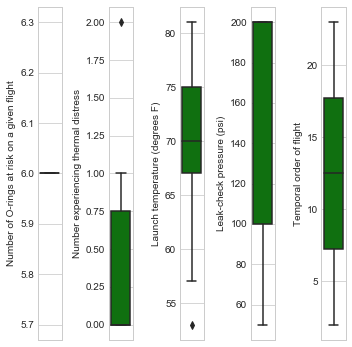

In [270]:
# Boxplot code as from source [5]

length = data.columns.values
column_count=5
data_length = len(length)
row_count = data_length-1/column_count
plt.figure(figsize=(column_count,5*row_count))
for i in range(data_length):
    plt.subplot(row_count + 1,column_count,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[length[i]],color='green',orient='v')
    plt.tight_layout()
    
### end of source [5]
# source [5] https://nbviewer.jupyter.org/github/PBPatil/
# Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb#Data-Insights

### Observations
* Only two outliers exist in our dataset which can be seen in the Launch temperature rectangle and the Number experiencing thermal distress rectangle.

## Distribution Graph
Distribution graphs are used to check the linearity of the variables. This allows us to see the skewness of the features.
* Here we use the ".figure()" and ".subplot()" functions as we did in the previous visualisations.
* The ".displot()" function from seaborn creates our distribution graph.

/Users/kwakuappiah-adu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/kwakuappiah-adu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/kwakuappiah-adu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


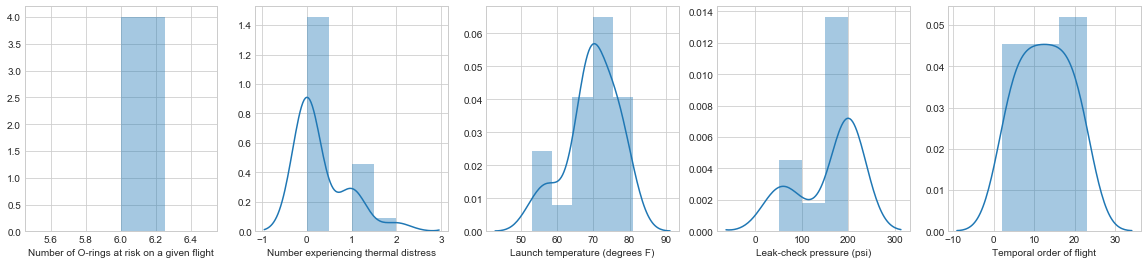

In [271]:
# Distribution Graph code as from source [5]

plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data[l[i]],kde=True)
    
### end of source [5]
# source [5] https://nbviewer.jupyter.org/github/PBPatil/
# Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb#Data-Insights

### Observations
* The "Temporal order of flight" seems to be normally distributed.
* The rest of the graphs appear to be skewed to the right (positively skewed).

_Reference: Source [4]_

## Scatter Diagram To Check for Linearity
Before we jump to implementing Multiple Linear Regression, we're going to check the linear relationship between "Launch Temperature" which is an independent variable and "Number experiencing thermal distress" which is the dependent variable.

We chose "Launch Temperature" because from our correlation diagrams we observed that it has a negative correlation with Number experiencing thermal distress.
* The ".scatter()" function from matplotlib is used to create a scatter plot of x and y data.

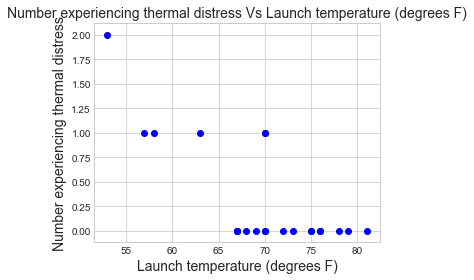

In [272]:
# Scatter plot code as from source [3]

plt.scatter(data['Launch temperature (degrees F)'], data['Number experiencing thermal distress'], color='blue')
plt.title('Number experiencing thermal distress Vs Launch temperature (degrees F)', fontsize=14)
plt.xlabel('Launch temperature (degrees F)', fontsize=14)
plt.ylabel('Number experiencing thermal distress', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


# end of source [3]
# source [3] https://datatofish.com/multiple-linear-regression-python/

### Observations
* There is a linear relationship between Launch Temperature and Number experiencing thermal distress.
* As the temperature increases the number experiencing thermal distress decreases

# Multiple Linear Regression
Now we use the ** train_test_split **, ** LinearRegression **, ** metrics **, ** mean_squared_error **, **r2_score** from ** Scikit-learn ** to perform ** Multiple Linear Regression ** on the dataset.

We will use multiple linear regression to predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing.

In [273]:
# Data splitting code as from source [2]

# Split the data into Attributes and Labels
X = data[['Number of O-rings at risk on a given flight', 'Launch temperature (degrees F)', 'Leak-check pressure (psi)',
       'Temporal order of flight']]
y = data['Number experiencing thermal distress']

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

## Split Data into Test and Training Datasets
We split the data in order to use part of it to train the model and the other part to make predictions so as to evaluate how well the model is performing.
* We use the "train_test_split()" method of Scikit-Learn to split the dataset into 80% for training and 20% for testing. The "random_state" argument splits the data randomly.

In [274]:
# Data splitting code as from source [2]

# Split data into training and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

## Train the Algorithm
Scikit-Learn has a LinearRegression class that we use to implement linear regression on our dataset.
* We instantiate the LinearRegression class with "regr = LinearRegression()" and call the ".fit()" method of the class to train our algorithm.

_Reference: Source [2]_

In [275]:
# Training Algorithm code as from source [2]

# Training the algorithm
regr = LinearRegression()
regr.fit(X_train, y_train)

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Find the Weights
As mentioned in the abstract our model will try to learn the weights in 𝑓(𝑥,𝑦,𝑧)=𝑤1𝑥+𝑤2𝑦+𝑤3𝑧 where 𝑤 represents the weights, also known as the coefficients.
* We use the ".coef_" method of the Linear regression class to find the weights for each feature.

In [276]:
# Finding Weights code as from source [2]

weights = pd.DataFrame(regr.coef_, X.columns, columns=['Weights'])
weights

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

,Weights
Number of O-rings at risk on a given flight,0.000000
Launch temperature (degrees F),-0.059365
Leak-check pressure (psi),0.003318
Temporal order of flight,-0.024500


## Make Predictions
Finally we predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing.
* We make predictions using test data X_test that we split from the dataset earlier.
* We use the ".predict()" method from Scikit-Learn to do this.

In [277]:
# Finding Weights code as from source [2]

y_pred = regr.predict(X_test)

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

## Compare
Now we compare the values from the prediction with the actual values from the test data X_test.

_Reference: Source [2]_

In [278]:
# Finding Weights code as from source [2]

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

,Actual,Predicted
4,0,0.024038
7,1,1.338668
5,0,0.106060
19,0,-0.023898
3,0,0.345361


### Observation
* From the table above we can tell that the predicted values are close to the actual values.

## Evaluate the Algorithm
Here we use 4 metrics to evaluate the performace of Multiple Linear Regression on our dataset:
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error
* Coefficient of determination

We use functions from Scikit-Learn to calculate each of these metric.

_Reference: Source [2]_

In [279]:
# Evaluating Algorithm code as from source [2]

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

### end of source [2]
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

Mean Absolute Error: 0.16760503781639607
Mean Squared Error: 0.049273588298674884
Root Mean Squared Error: 0.2219765489836142
Coefficient of determination: 0.69


### Observation
* From the results of our metrics we can tell that our algorithm performed well.
* Our predictions are close to the actual values and so that minimizes the error values that we get for **MAE**, **MSE** and **RMSE**.
* We get an **R squared** value of 0,69 which is not bad.